In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
df = pd.read_csv('penguins_cleaned.csv')

In [26]:
# df["bill_length_mm"].min() 
#32.1
df["bill_length_mm"].max()

59.6

In [27]:
df['bill_length_mm'].value_counts().describe()

count    163.000000
mean       2.042945
std        1.193344
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: bill_length_mm, dtype: float64

<AxesSubplot:>

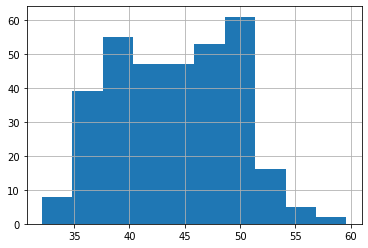

In [30]:
df['bill_length_mm'].hist()

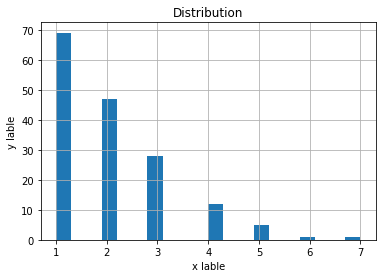

In [31]:
import matplotlib.pyplot as plt
df['bill_length_mm'].value_counts().hist(bins = 20)
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()

In [32]:
print(df["bill_depth_mm"].min()) 
print(df["bill_depth_mm"].max())

13.1
21.5


In [33]:
print(df["flipper_length_mm"].min()) 
print(df["flipper_length_mm"].max())

172
231


In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [6]:
target = 'species'
encode = ['sex','island']

In [7]:
for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df[col]

In [8]:
target_mapper = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
def target_encode(val):
    return target_mapper[val]

In [9]:
df['species'] = df['species'].apply(target_encode)

In [10]:
X = df.drop('species', axis=1)
y = df['species']

## Split features and target into train and test sets

**startify = y** tells train_test_split to make sure that the training and test datasets contain examples of each class in the same proportion as in the original dataset.
This is especially important to do because of how imbalanced the classes are.

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

In [16]:
# Building random forest model

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
y_pred_test = clf.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9880952380952381

In [18]:
confusion_matrix(y_test, y_pred_test)

array([[37,  0,  0],
       [ 1, 16,  0],
       [ 0,  0, 30]], dtype=int64)

In [22]:
# Saving the model
import pickle
pickle.dump(clf, open('penguins_clf_model.pkl','wb'))